In [1]:
import os
import re
import glob 
import tables
import corner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy import stats
from scipy.stats import norm

<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(B_n).set_size_inches(8.0,8.0)
<ipython-input-34-b31c316c0f68>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

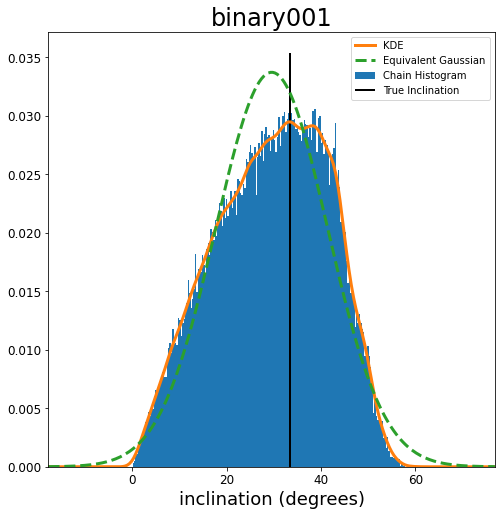

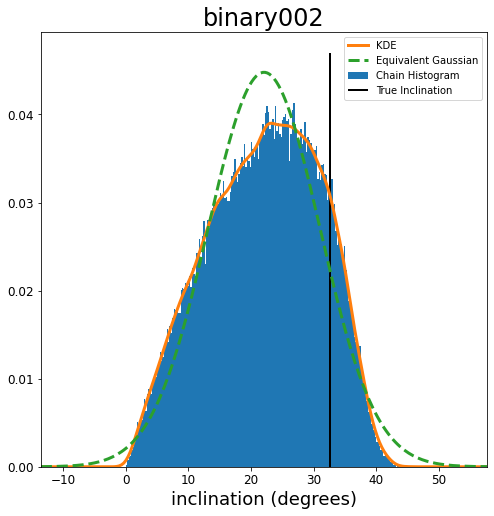

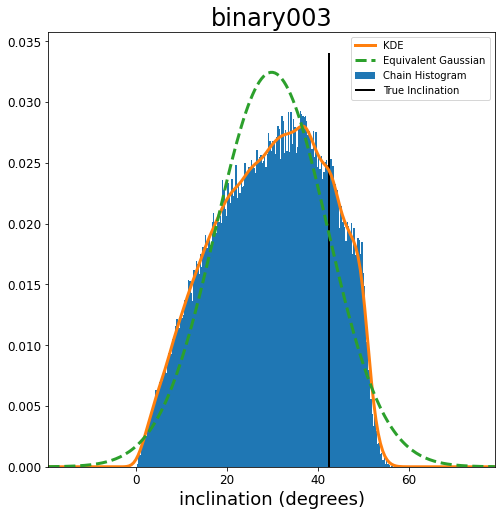

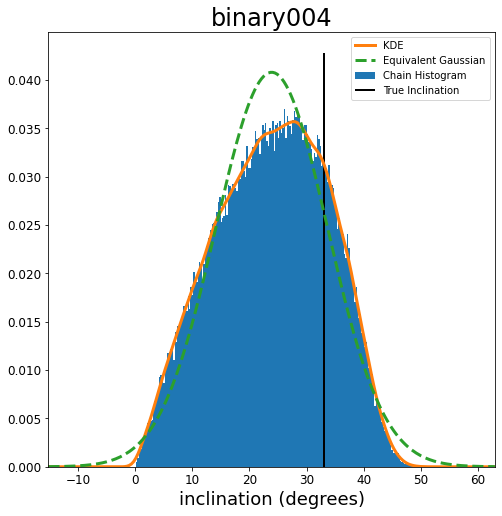

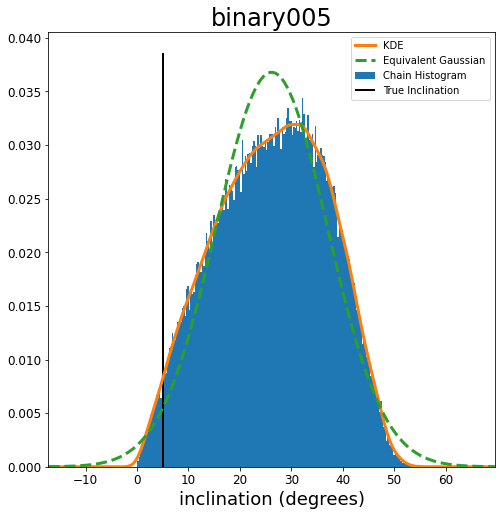

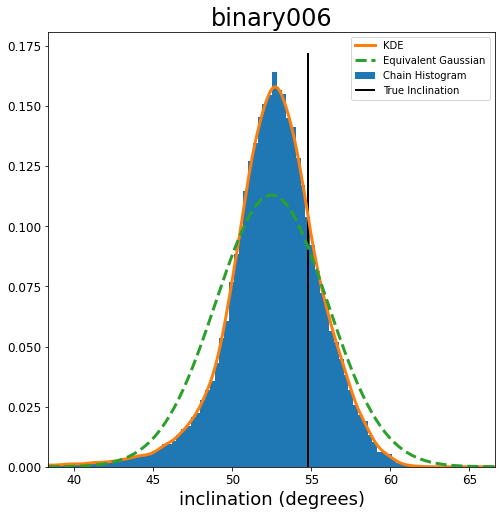

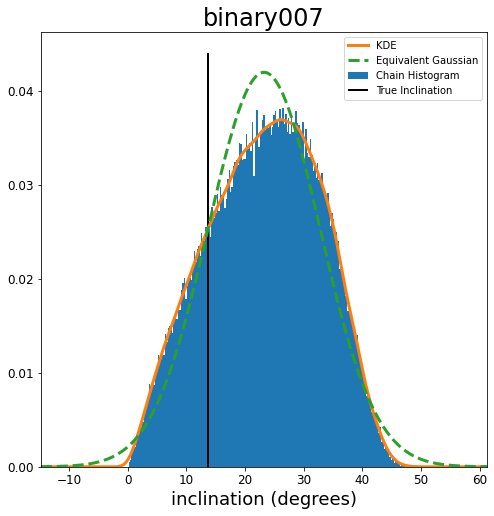

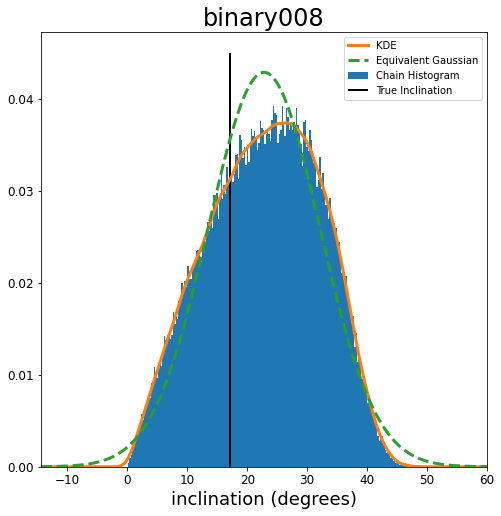

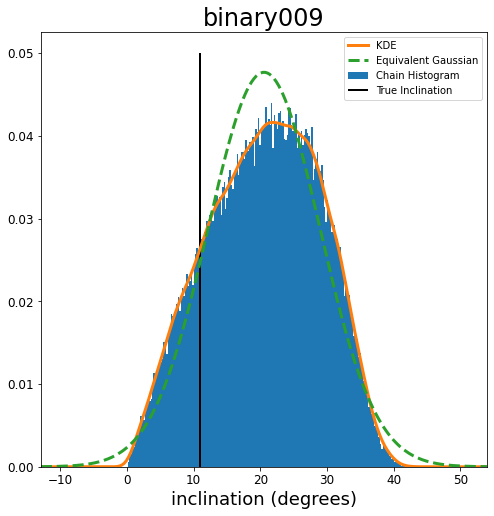

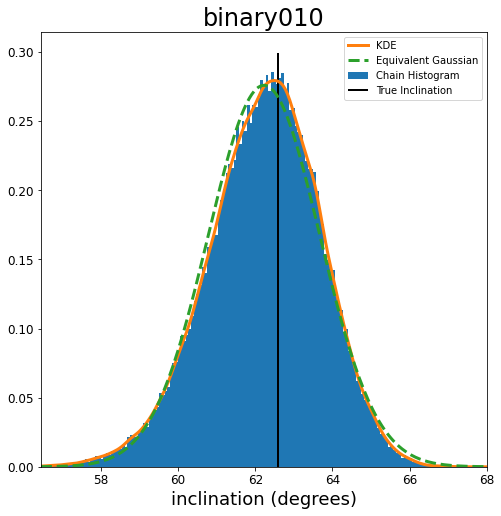

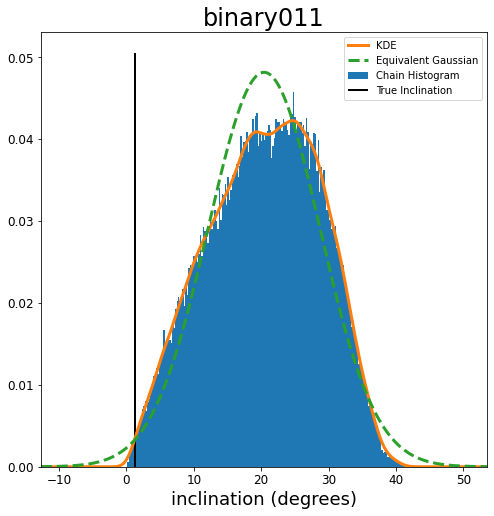

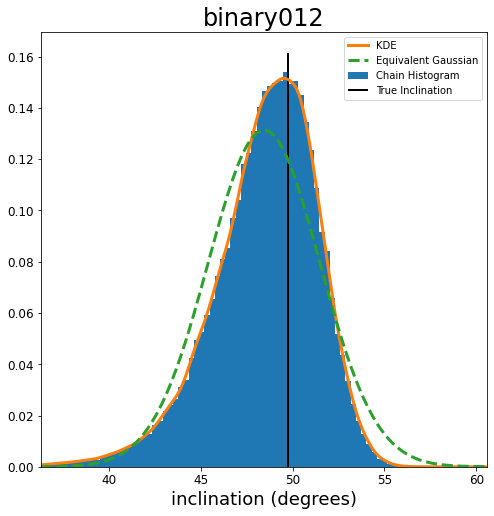

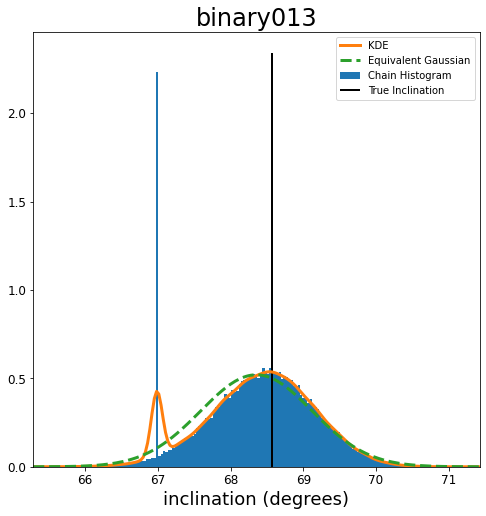

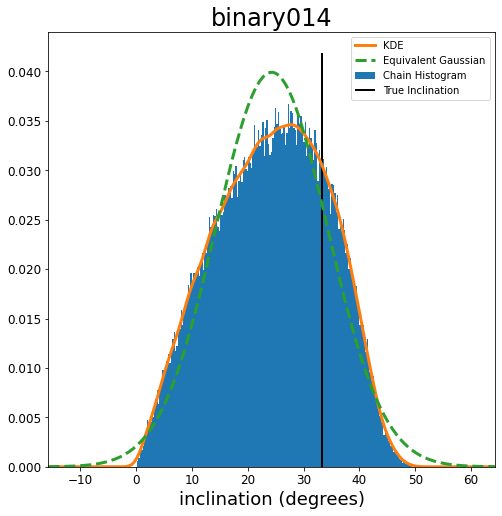

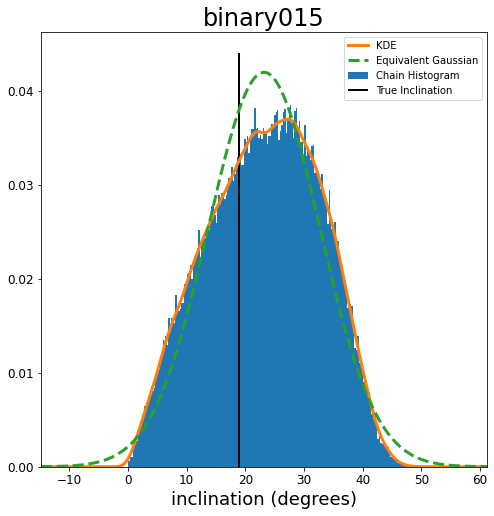

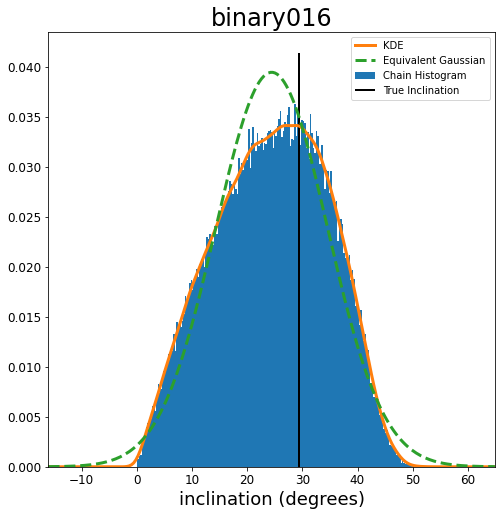

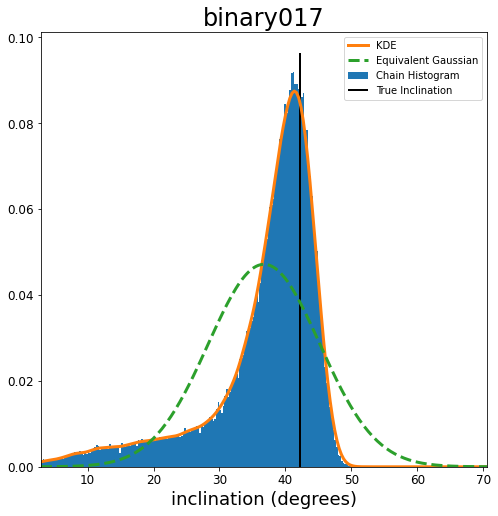

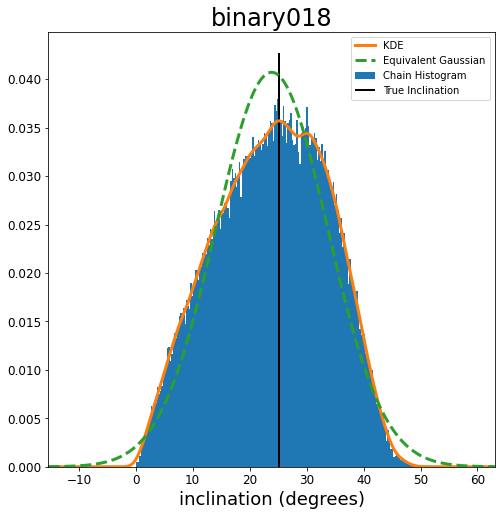

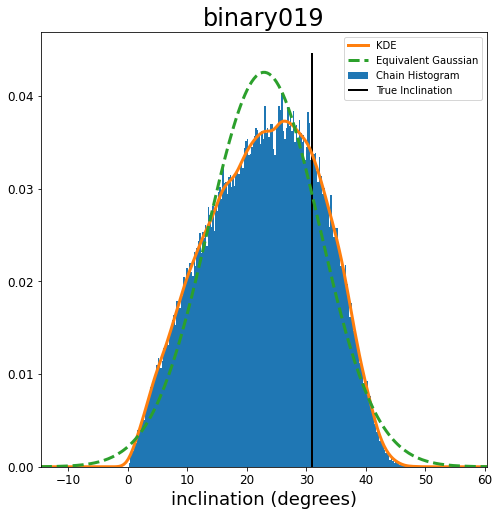

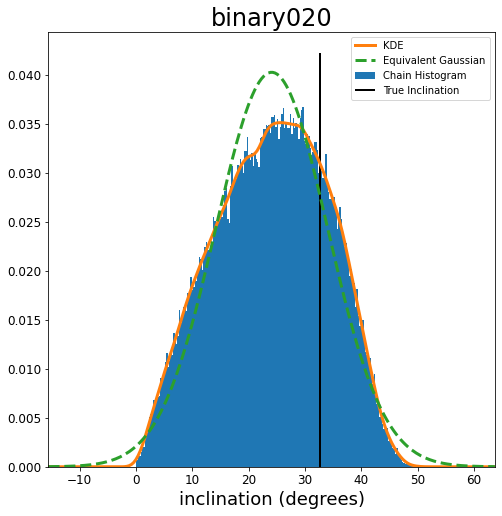

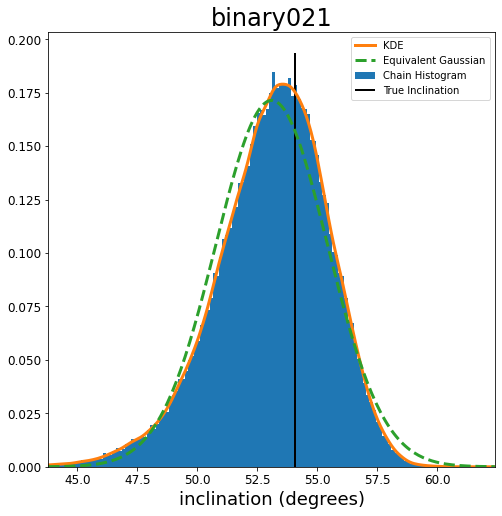

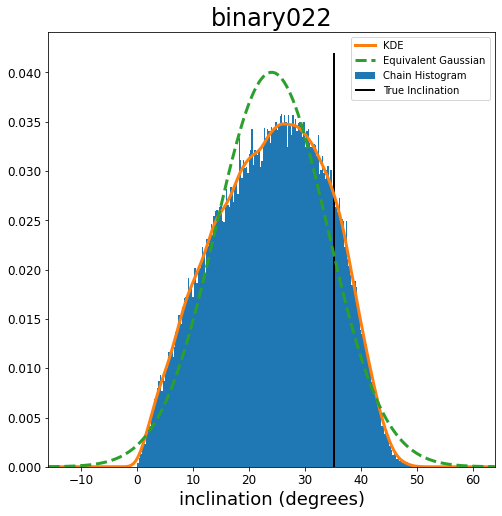

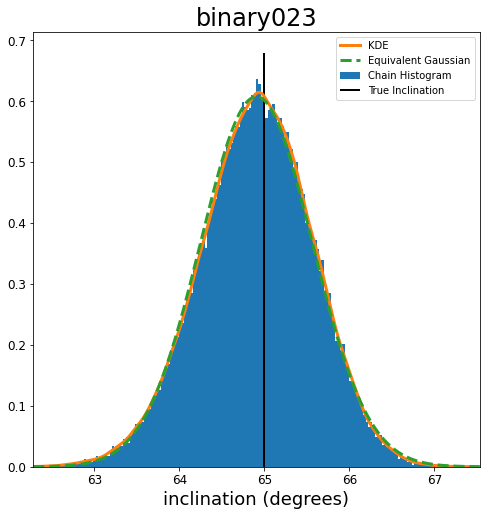

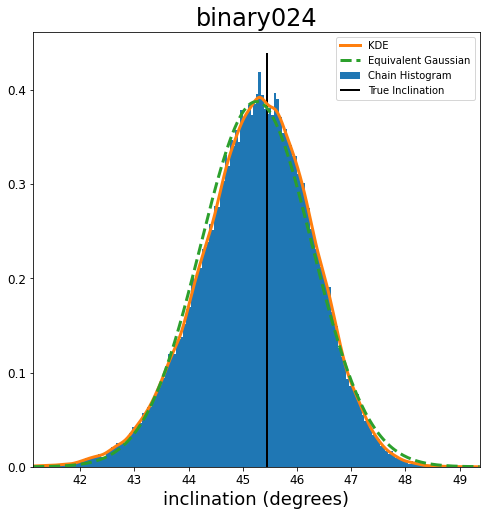

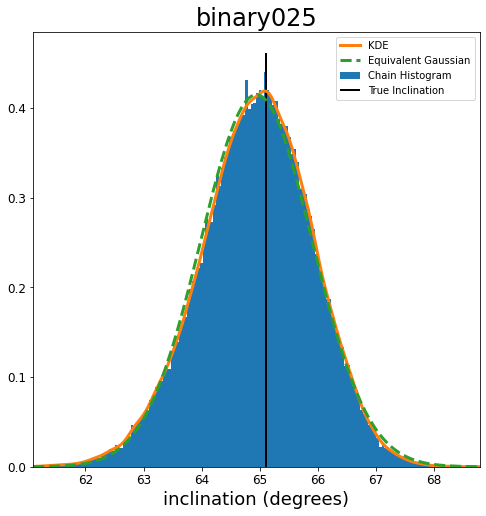

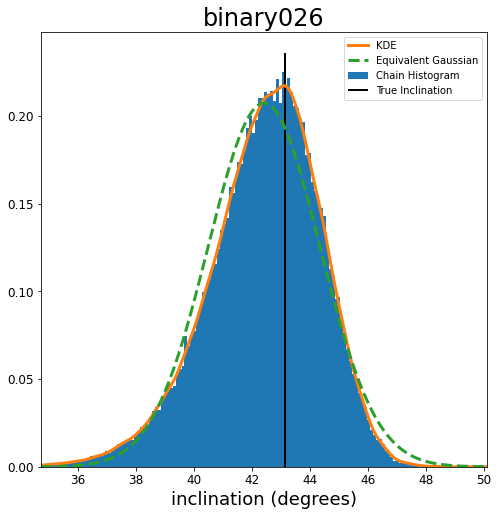

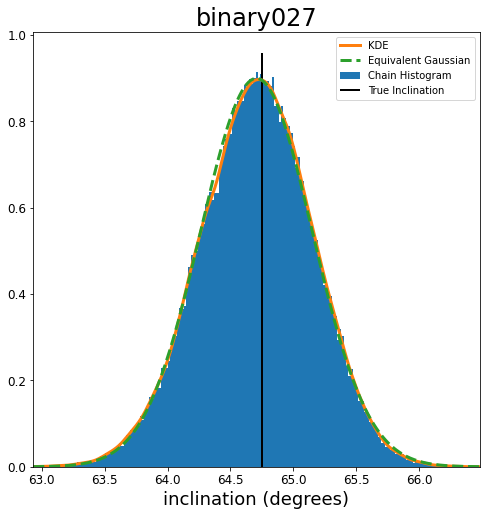

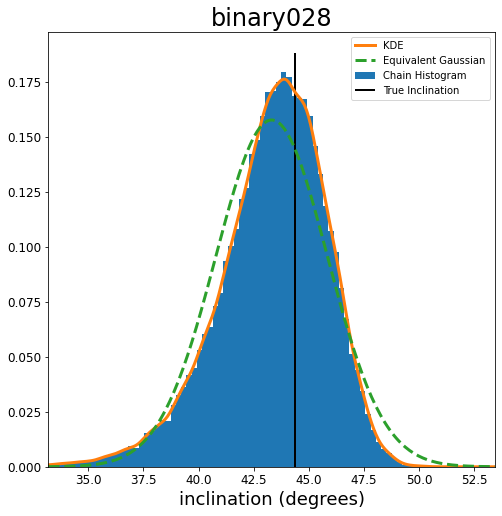

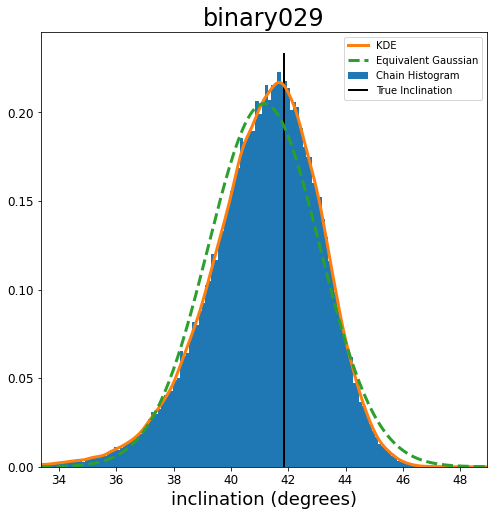

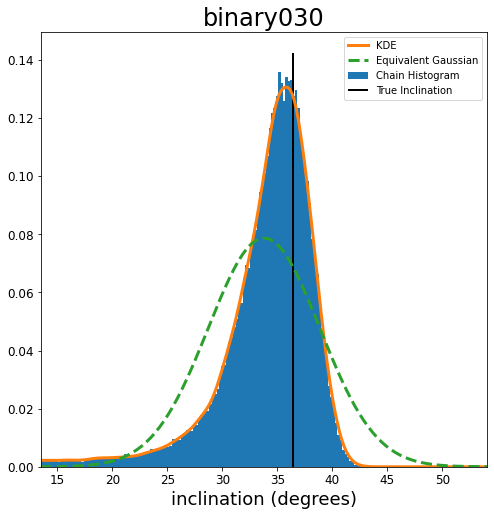

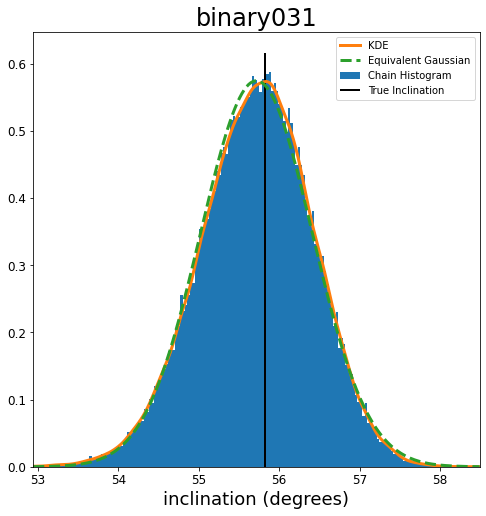

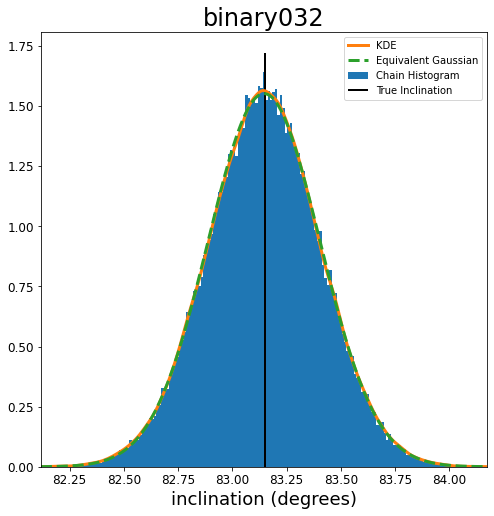

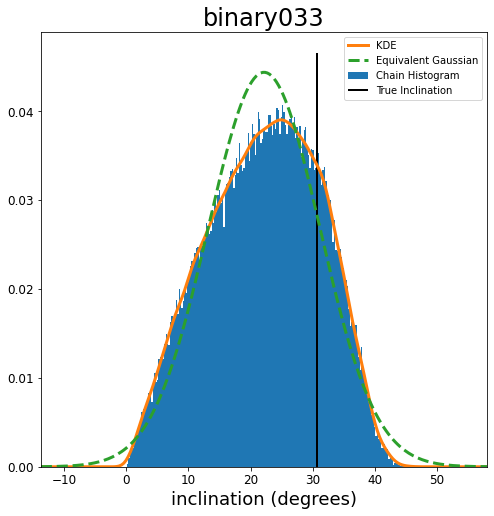

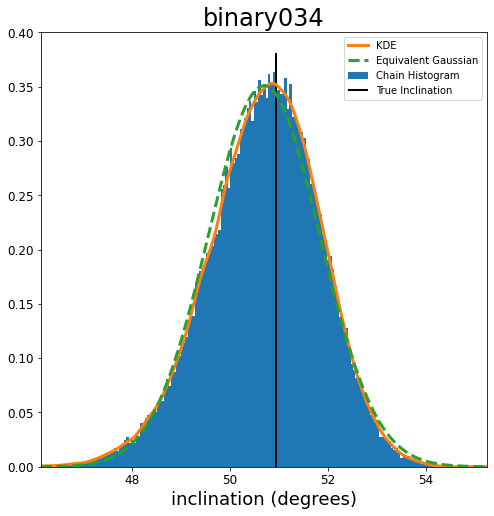

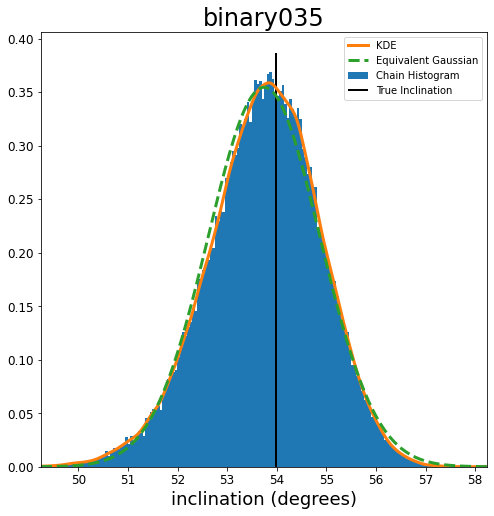

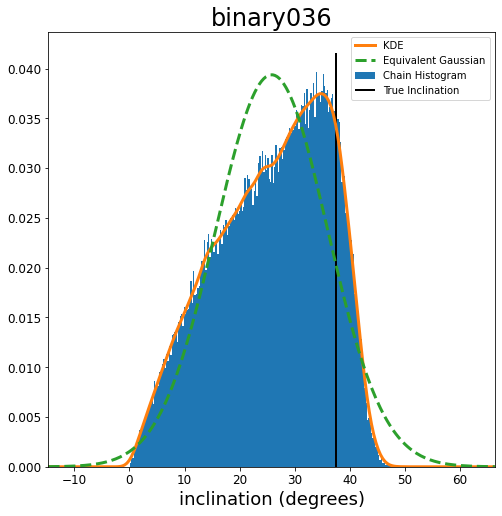

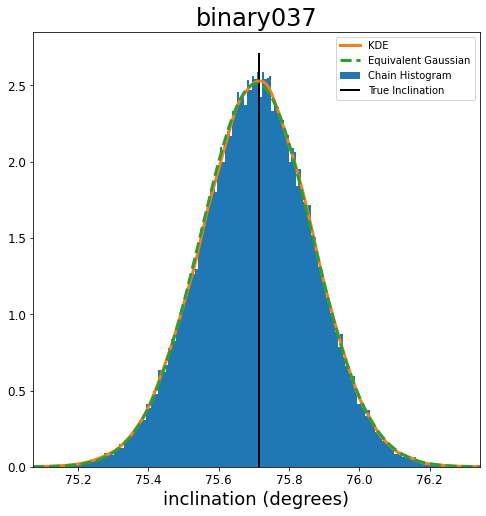

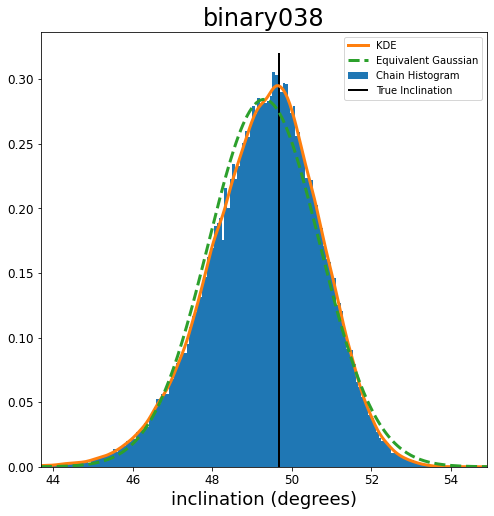

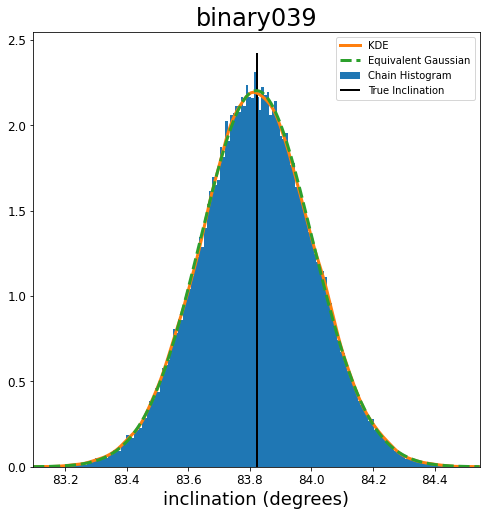

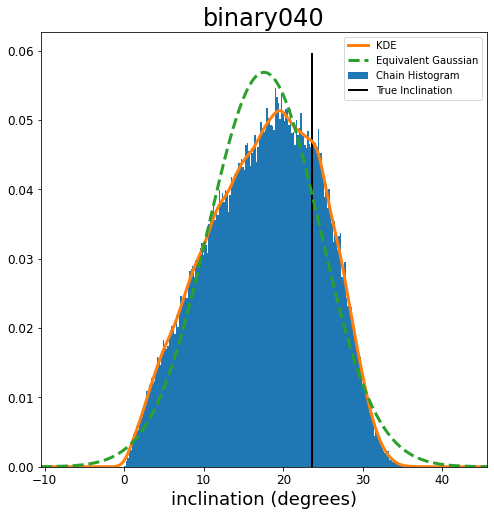

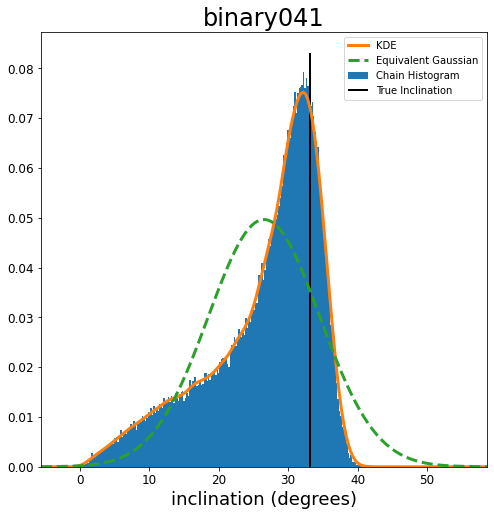

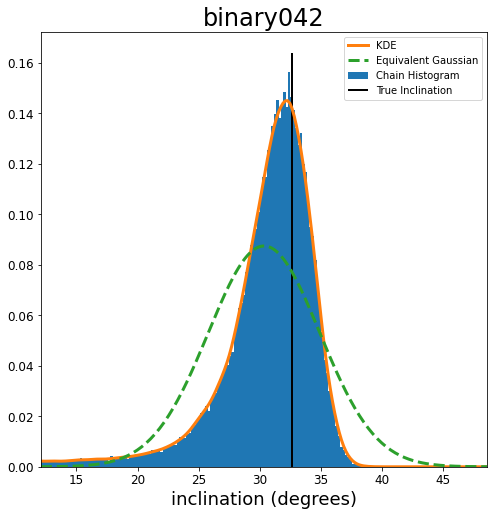

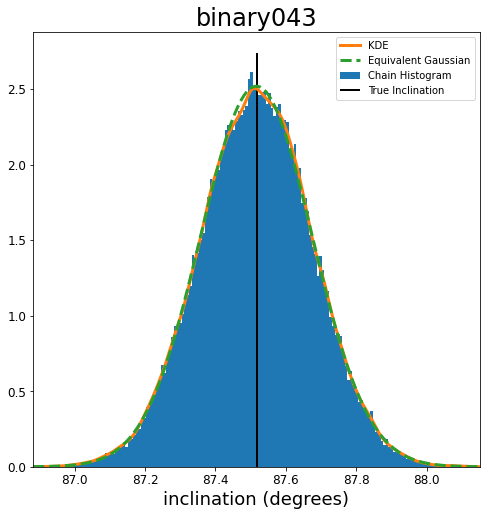

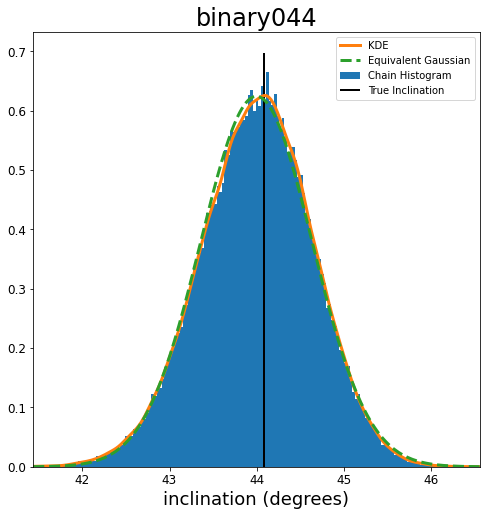

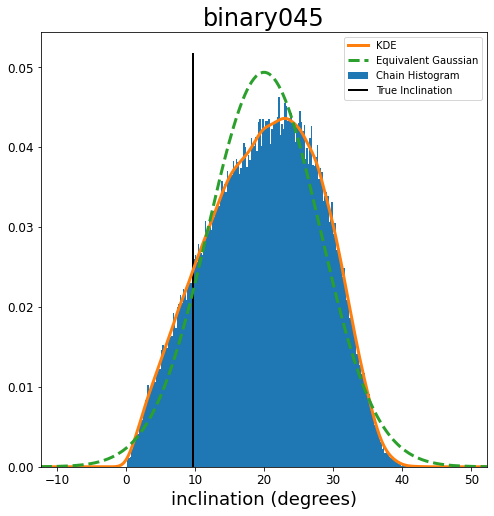

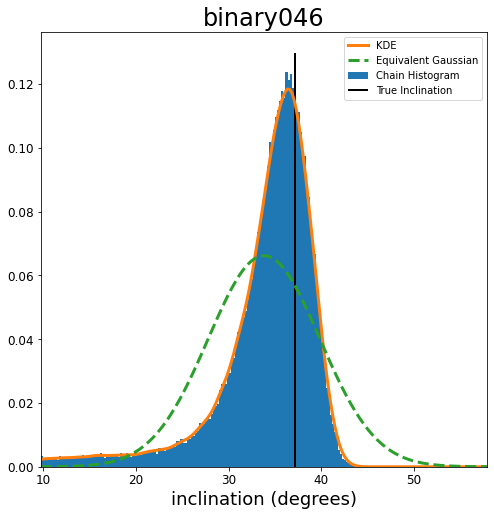

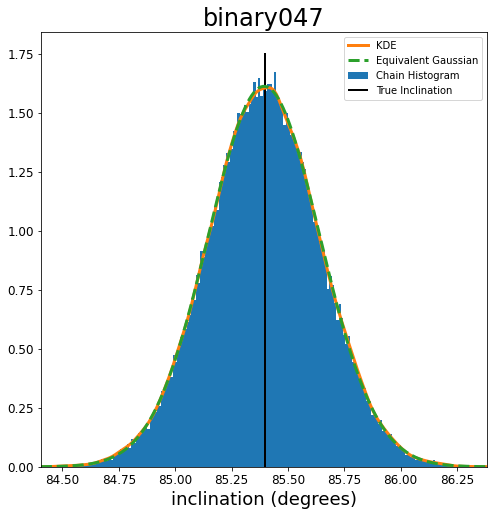

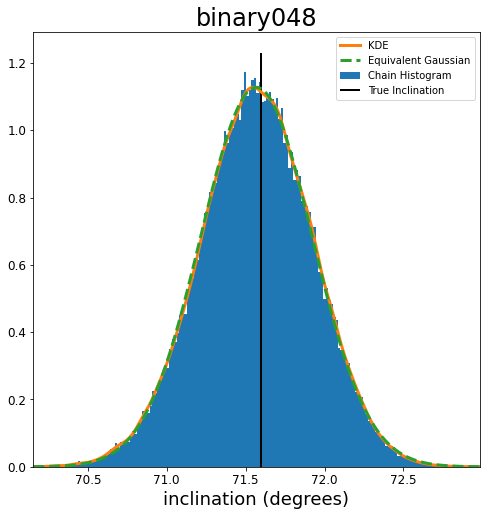

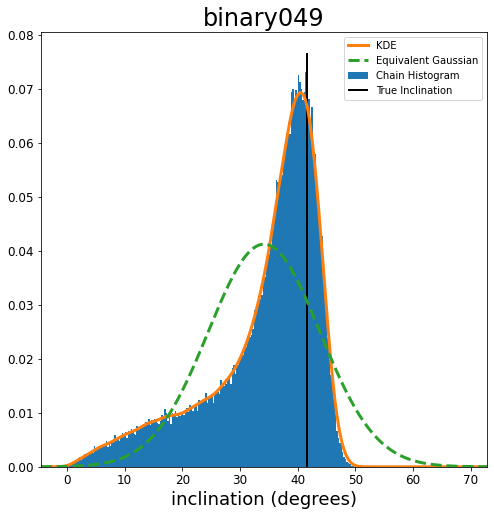

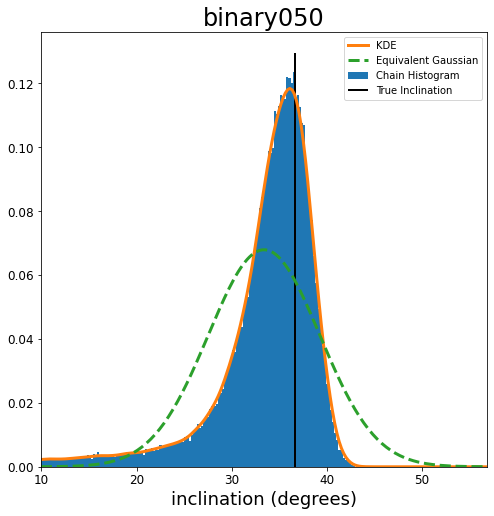

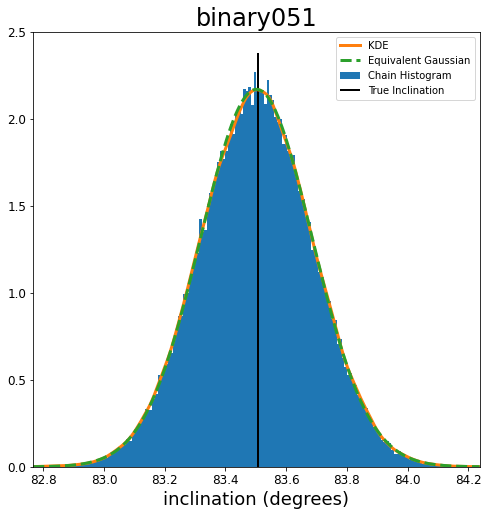

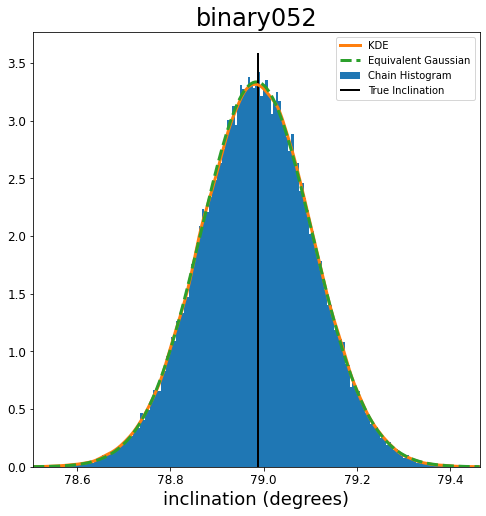

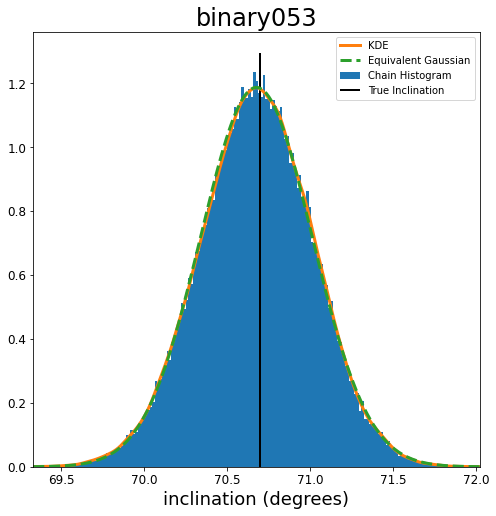

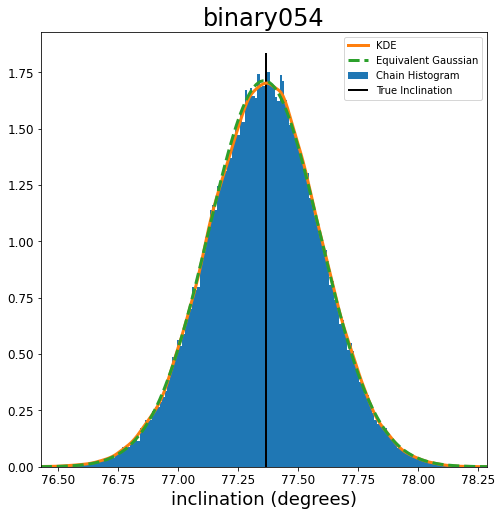

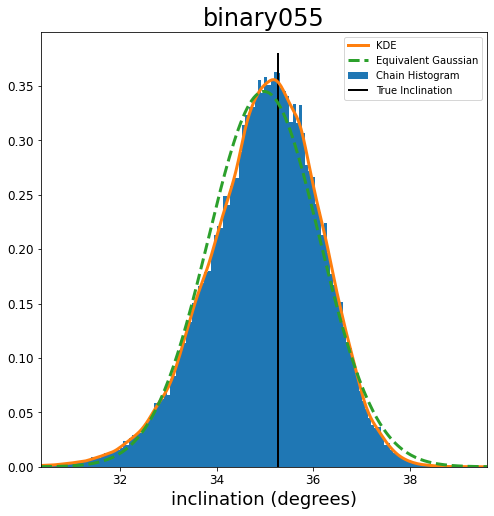

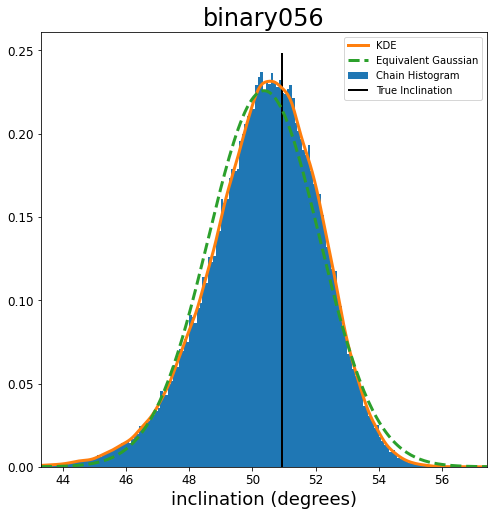

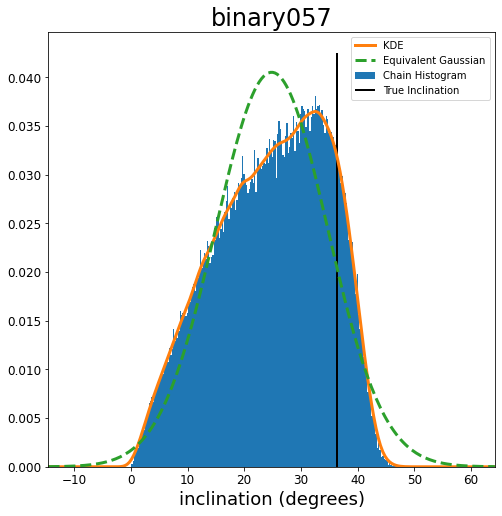

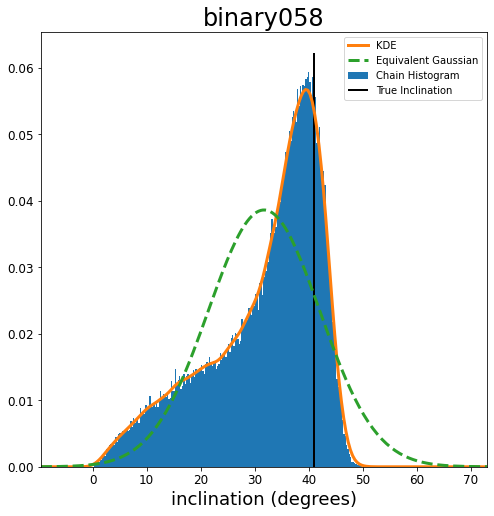

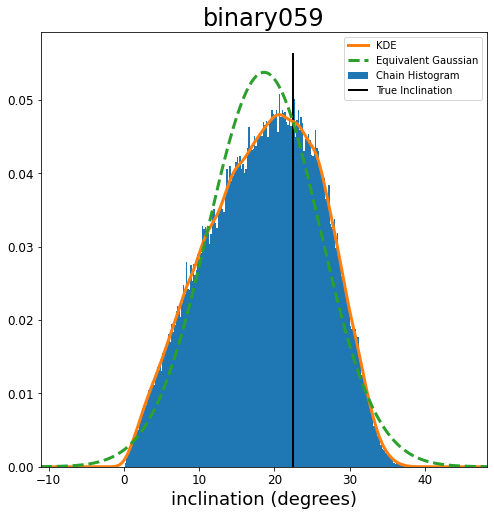

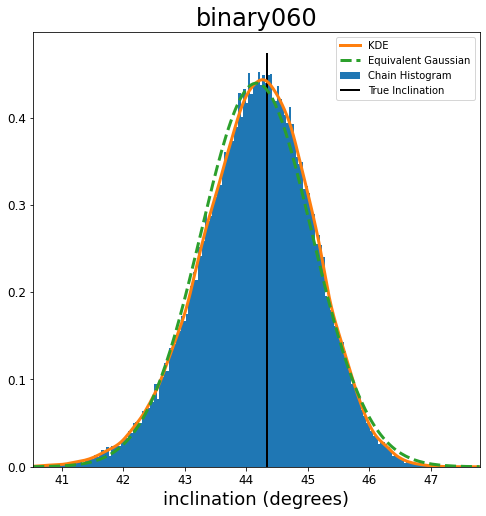

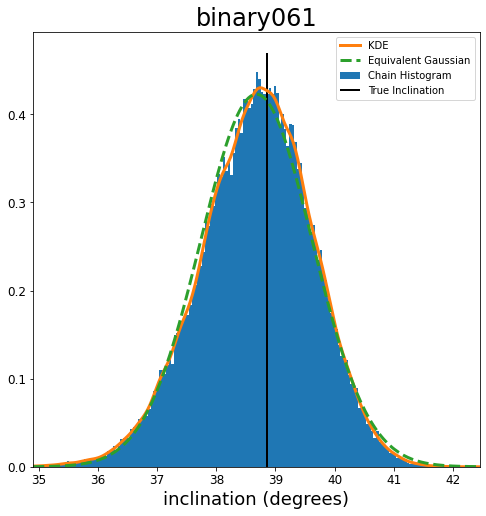

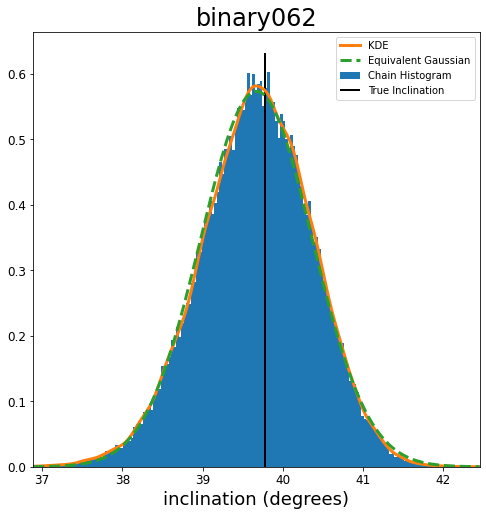

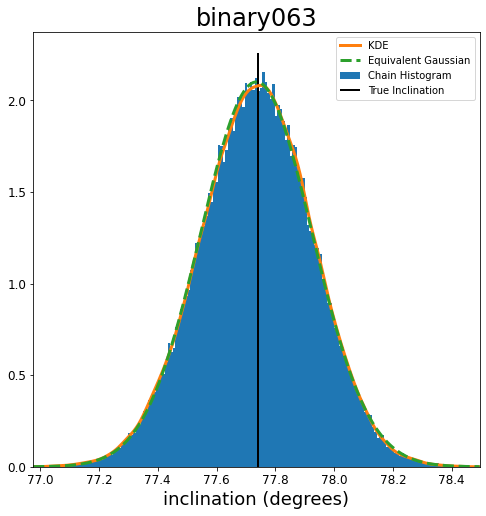

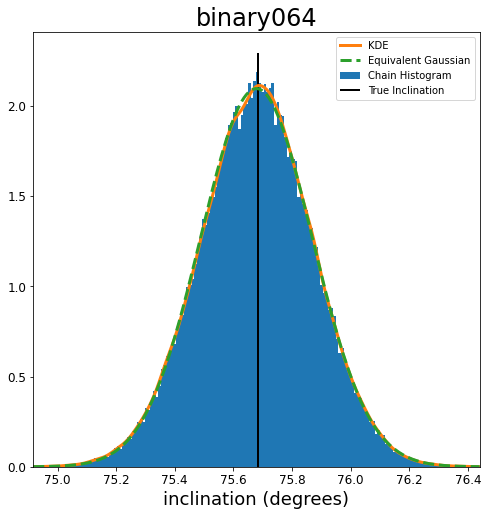

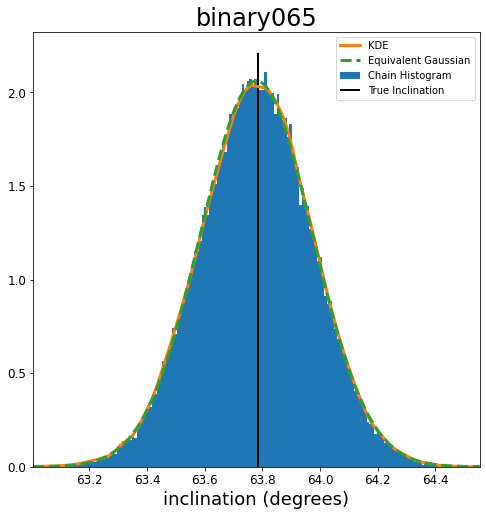

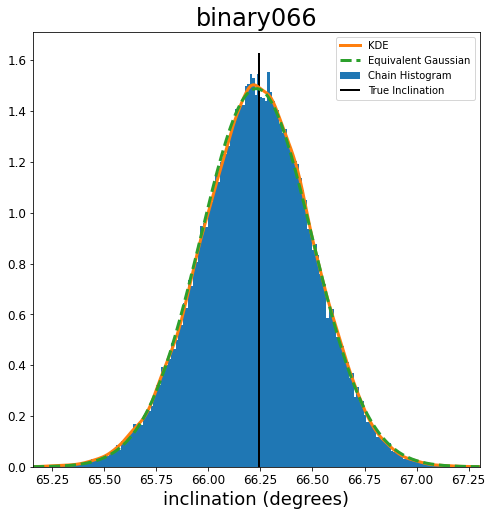

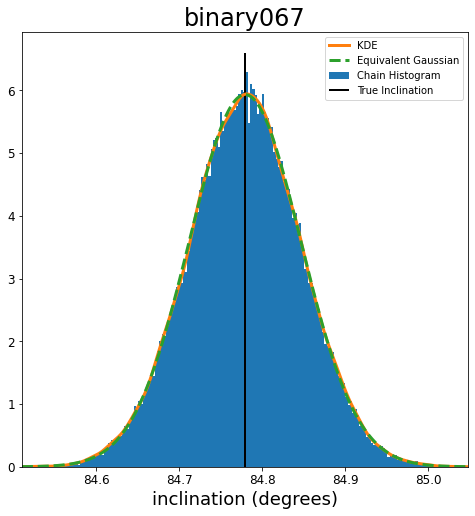

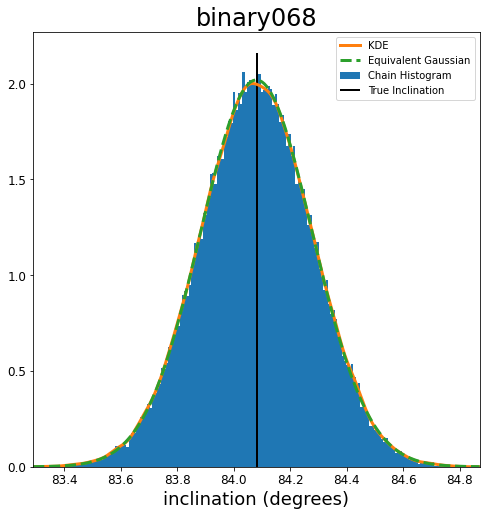

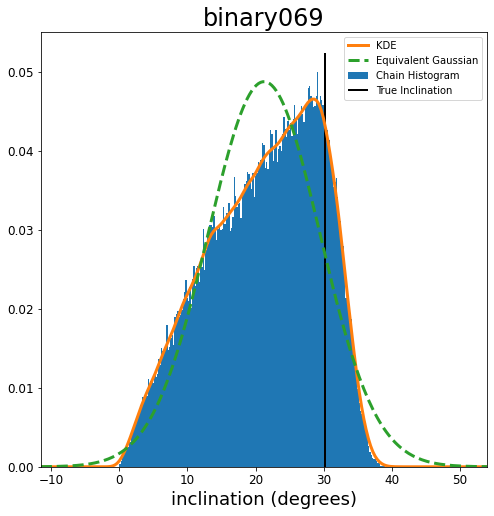

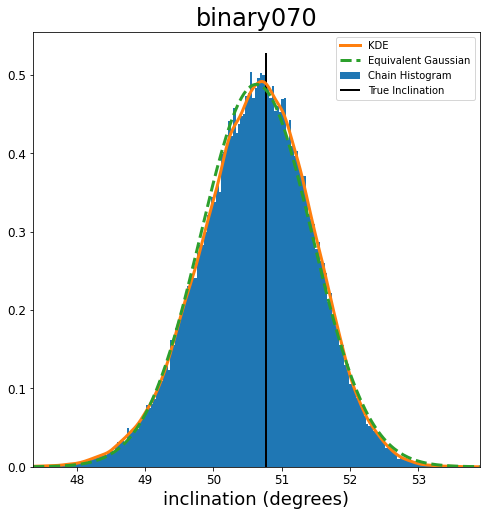

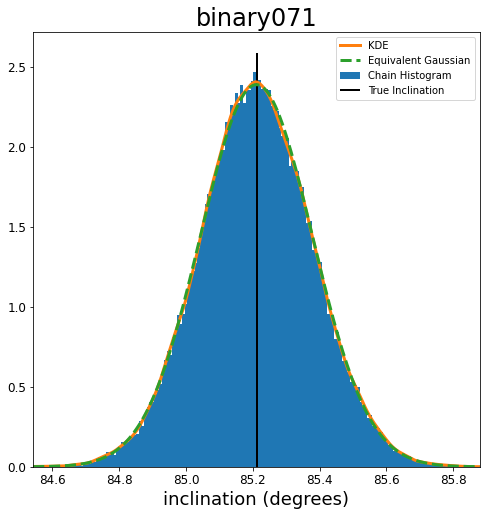

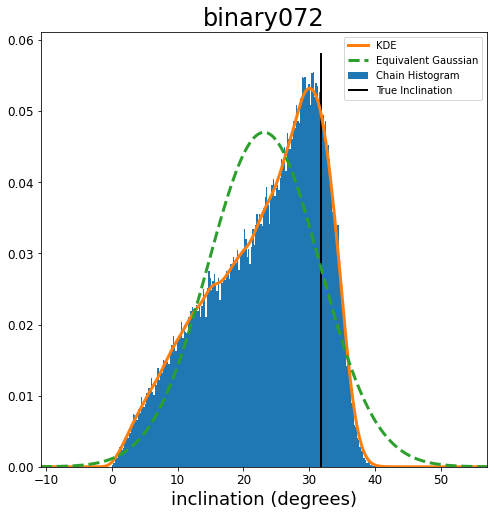

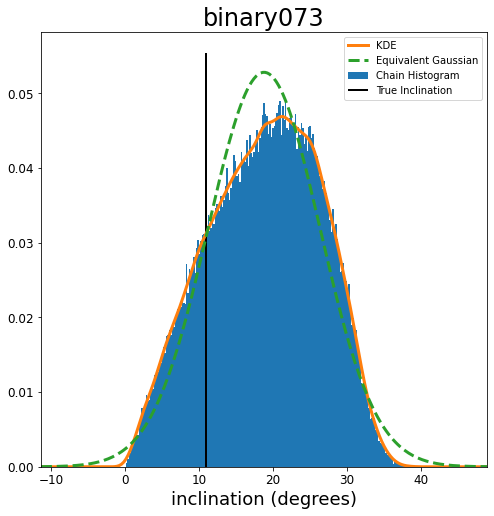

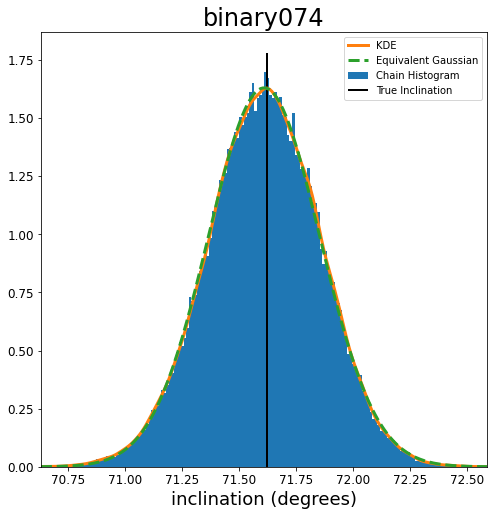

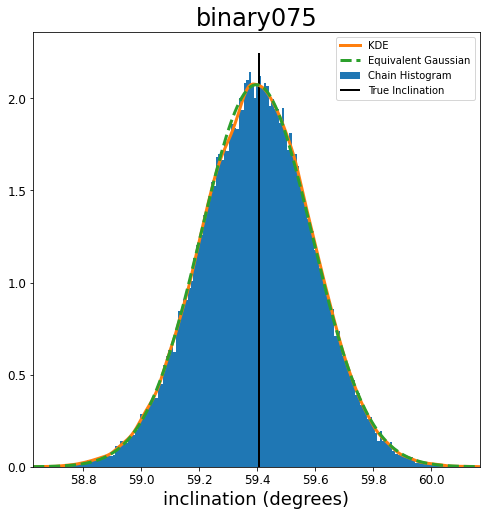

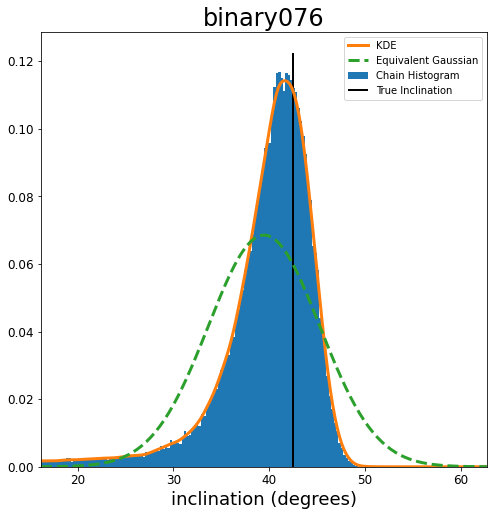

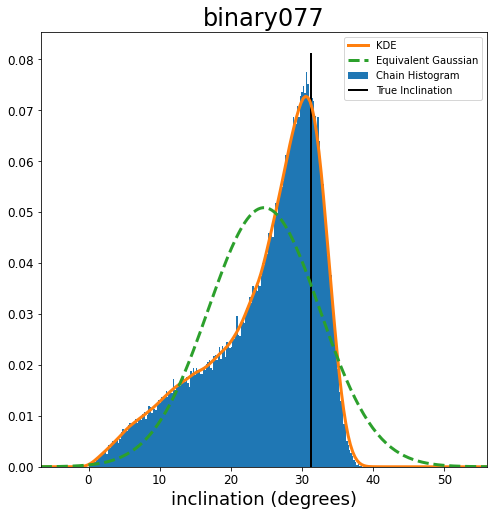

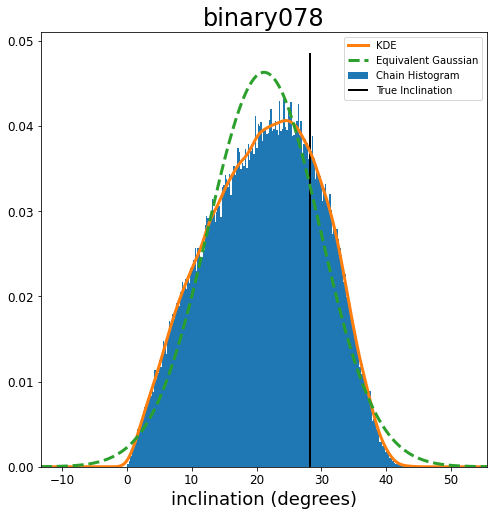

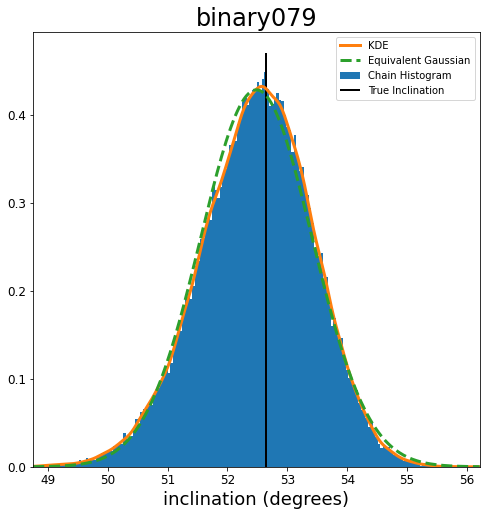

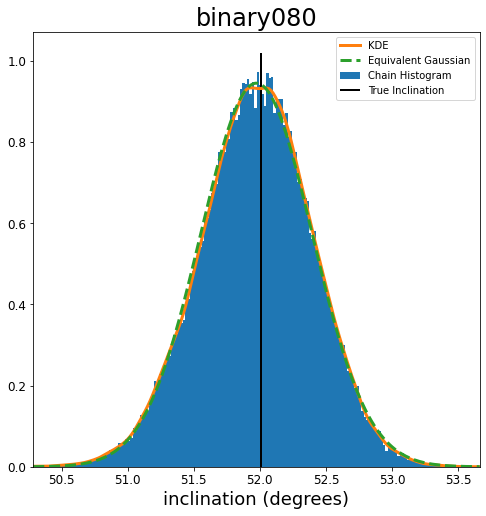

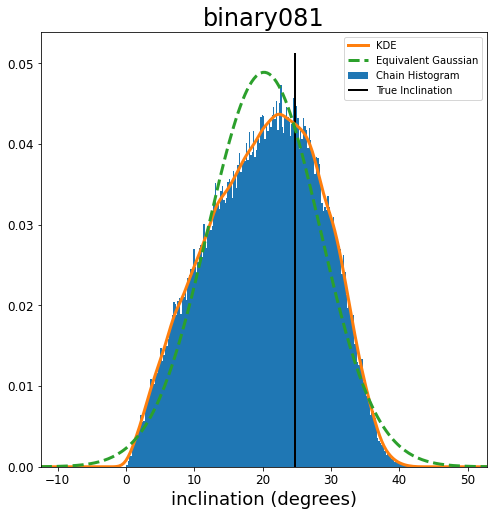

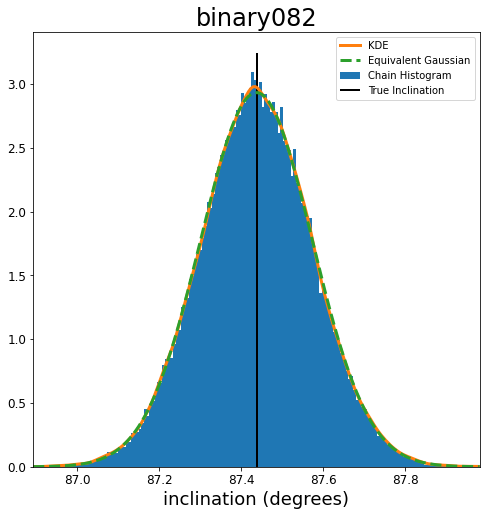

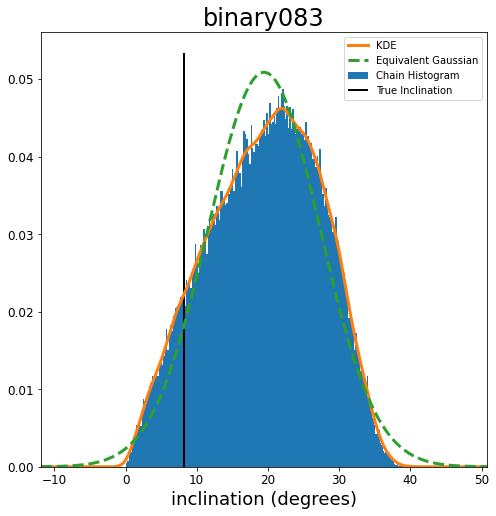

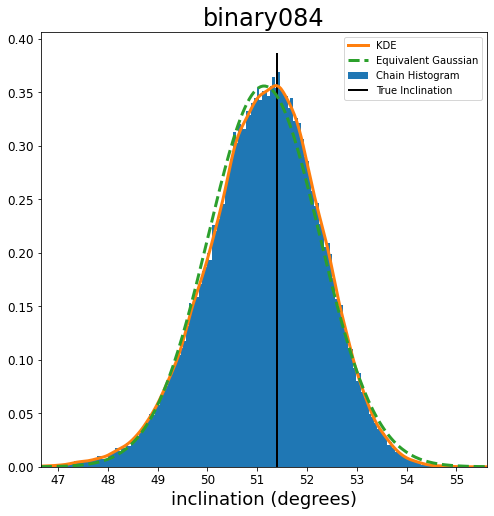

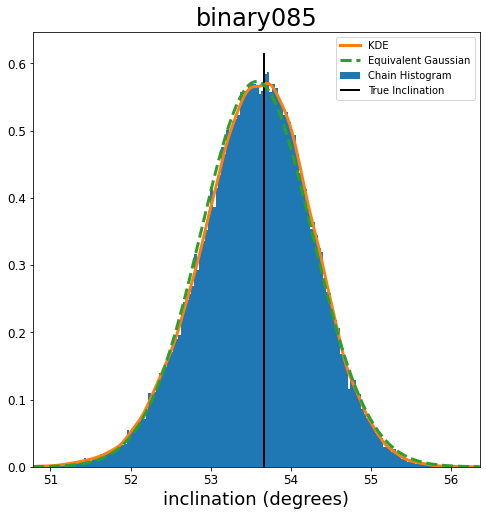

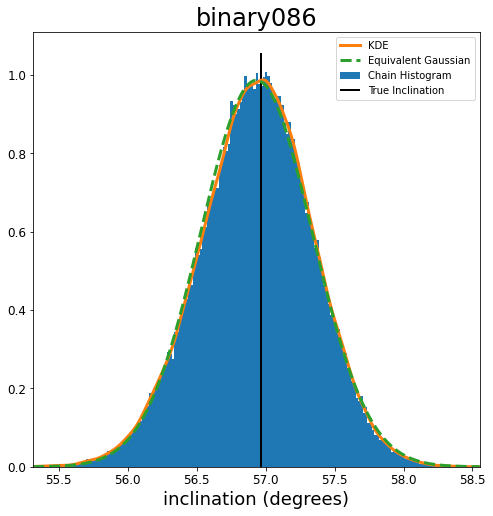

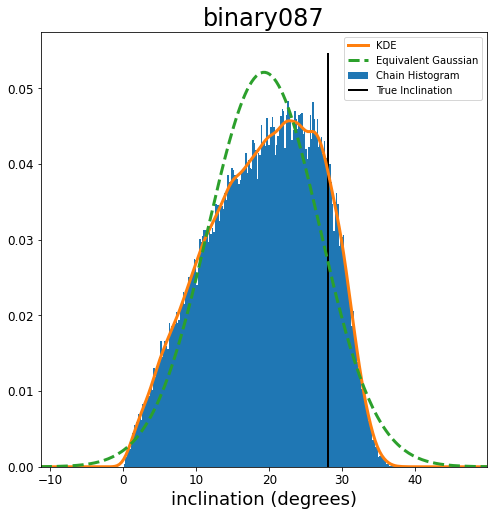

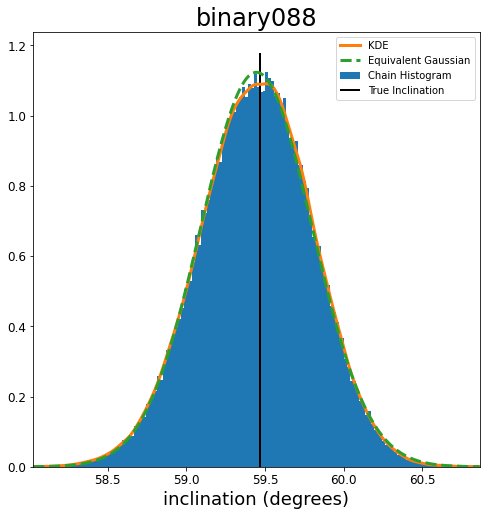

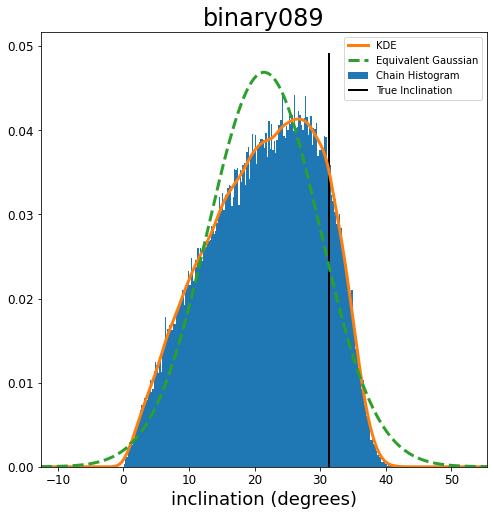

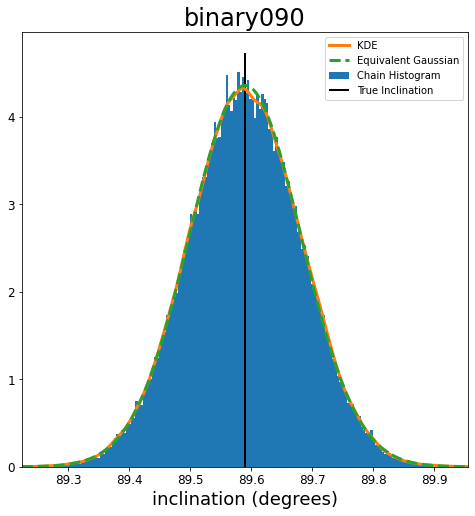

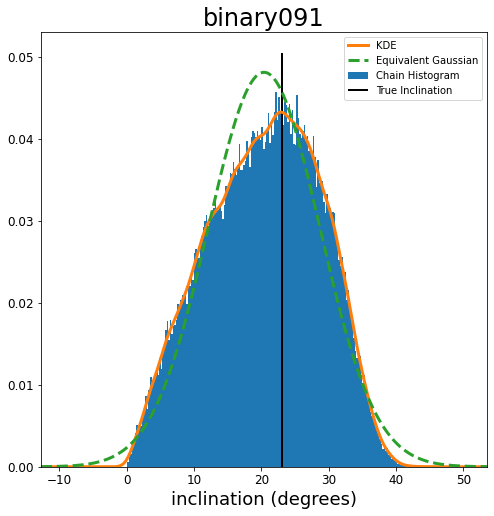

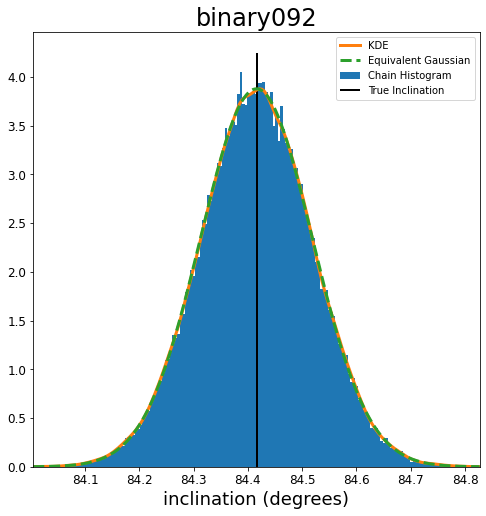

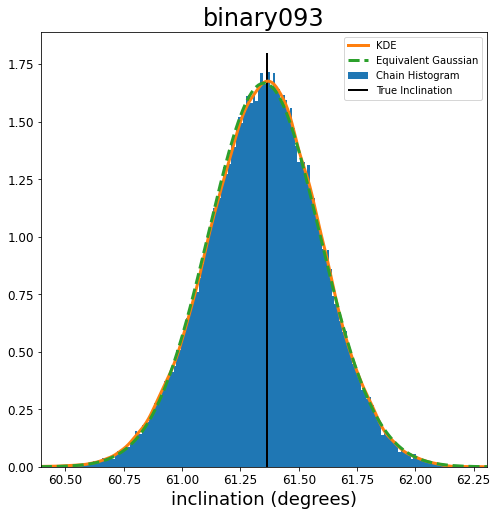

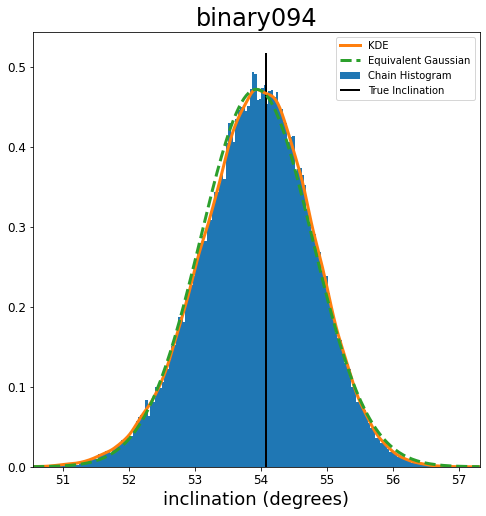

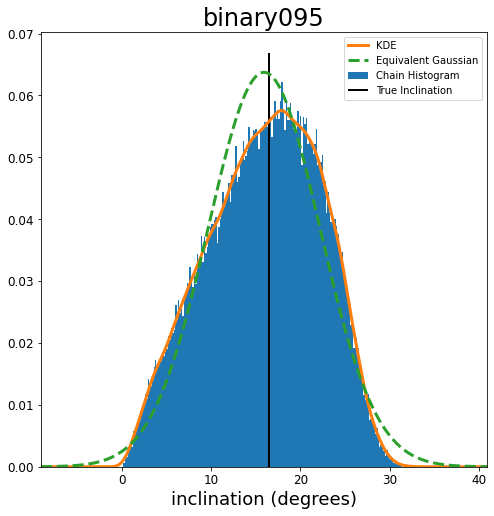

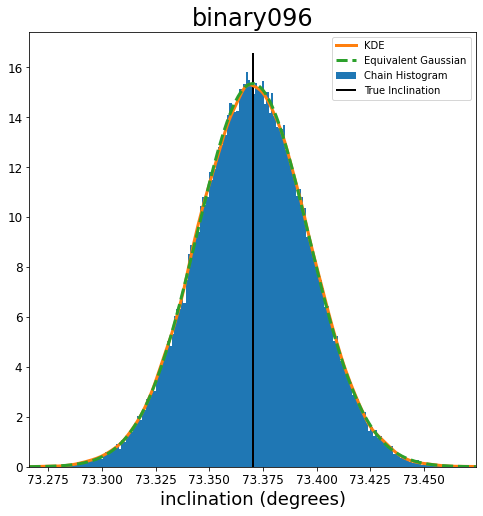

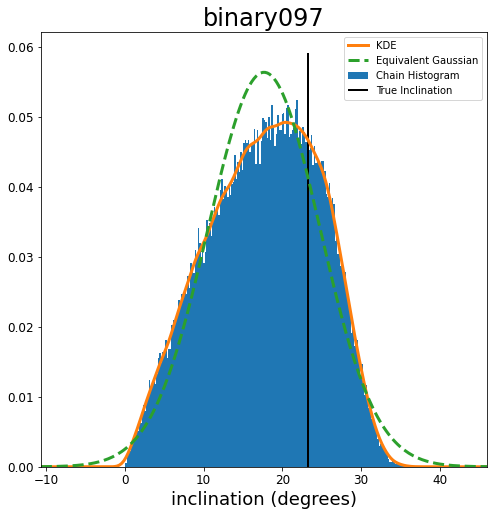

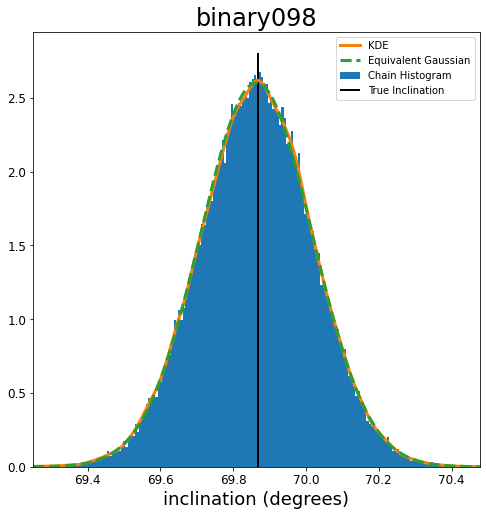

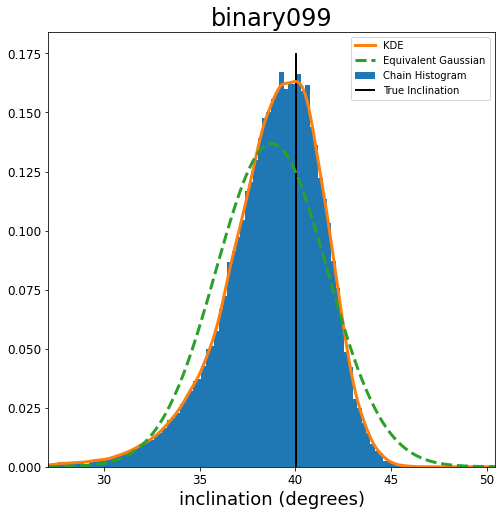

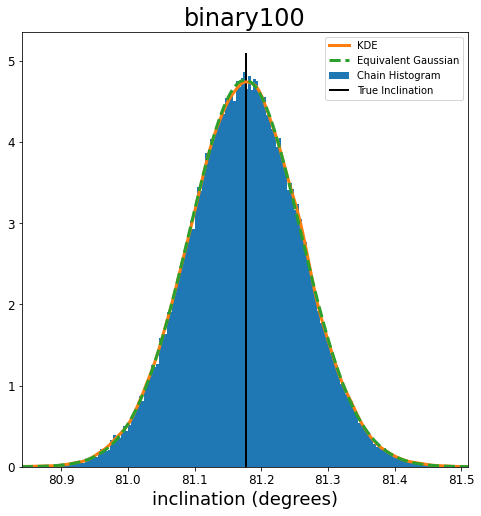

In [34]:
columns = ['f','fdot','amplitude','colatitude','longitude','inclination','polarization','phase']
T = '../../data/08yr_sp32_100_binaries/'
C = '/chains/dimension_chain.dat.1'

incl = []
bins = 200
                
for B in os.listdir(T):
    B_n = int(re.search('binary(.*)',B).group(1))
    basefile = open(os.path.join(T,os.path.join(B,B+'.dat')),'r')
    for pos, line in enumerate(basefile):
        values = [float(i) for i in line.split()]
        incl.append(90 - abs(np.degrees(values[5]) - 90))
        #incl.append(np.degrees(values[5]))
    basefile.close()

    chain = pd.read_table(T+B+C,delimiter=' ',header=None,index_col=False,names=columns)
    chain['inclination'] = np.degrees(np.arccos(chain['inclination']))
    chain['inclination'] = 90 - abs(chain['inclination'] - 90)
    mu = np.mean(chain['inclination'])
    std = np.std(chain['inclination'])
    
    plt.figure(B_n).set_size_inches(8.0,8.0)
    plt.hist(chain['inclination'], bins=bins, density=True, stacked=True, label='Chain Histogram')

    kde = stats.gaussian_kde(chain['inclination'])
    x = np.linspace(mu-4*std,mu+4*std,200)
    plt.plot(x, kde(x), linewidth=3, label='KDE')
    plt.plot(x, norm.pdf(x,mu,std), linestyle='dashed', linewidth=3, label='Equivalent Gaussian')
    ymin, ymax = plt.ylim()
    plt.vlines(incl[B_n-1], ymin, ymax, linewidth=2,label='True Inclination')
    plt.xlim(mu-4*std, mu+4*std)
    plt.xlabel('inclination (degrees)', fontsize=18)
    plt.title('binary'+str(B_n).zfill(3), fontsize=24)
    plt.legend(fontsize=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plotName = os.path.join('plots',('binary'+str(B_n).zfill(3)+'_incl_hist.png'))
    plt.savefig(plotName, bbox_inches='tight')